#  I- Régression Linéaire Multiple

On parle de Régression Linéaire Multiple lorsqu'on integre plusieures variables $x_1,x_2,....x_n$
 à notre modèle et que les choses commencent à devenir vraiment intéressantes. 
Le but de la Régression Linéaire Multiple est de rouver le meilleur ensemble  $\theta=(\theta_0,\theta_1,...., \theta_n)$ revient à  minimiser le coût global des erreurs unitaires qui se définit comme suit :
		$$  \min J(\theta)=\min_{\theta}\frac{1}{2m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))^2$$
avec $m$ est la taille du training set.
Avec $$h_\theta(x)=\theta_0+\theta_1 x_1+\theta_2x_2+.....+\theta_n x_n $$  


# 1-datasets

###   Créer un modèle à deux variables de régression linéaire multiple (n=2), 
 (x,y) avec $m$ exemples, $2$ variables 
		
$
			X=\begin{pmatrix} 
			x_1^{(1)}&	x_2^{(1)}&1\\                
			x_1^{(2)}&x_2^{(2)}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x_1^{(m)}&x_2^{(m)}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	
  

#### 1-Générer de données aléatoires
#### 2-Afficher les données en 2D puis en 3D


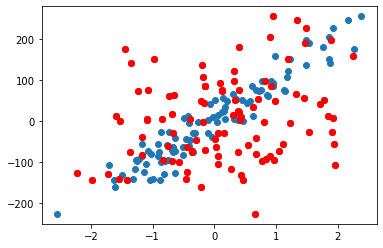

In [200]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
np.random.seed(0)
x,y= make_regression(n_samples = 100 , n_features = 2 , noise = 0.01)
plt.scatter(x[:,0],y , c='r')
plt.scatter(x[:,1],y)



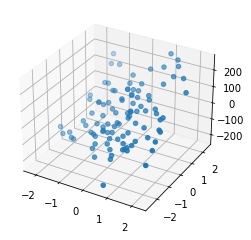

In [201]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x[:,0] ,x[:,1],y )

#### 3-redimentioner les matrices, créer la matrice X et $\theta$

In [131]:
y=y.reshape(100,1)0
y.shape
x.shape

(100, 2)

In [132]:
X=np.hstack((x,np.ones((100,1))))


In [133]:
np.random.seed(0)
theta=np.random.randn(3,1)
theta


array([[1.76405235],
       [0.40015721],
       [0.97873798]])

#### 4-Implémenter le model de prédiction, Fonction cout, Gradients et Descente de Gradient

In [154]:
def h(X , theta):
    return X.dot(theta)

In [155]:
#fonction de cout
def J(X , y , theta):
    m = len(y)
    return 1/(2*m) * np.sum((h(X,theta) - y)**2)

J(X,y,theta)

5119.30602087231

In [158]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(h(X , theta) - y)


In [162]:


def gradient_descent(X , y , theta , alfa , n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - (alfa * grad(X , y, theta))
        cost_history[i] = J(X , y, theta)
    return theta , cost_history 


        

 #### 5-Afficher les valeurs de $\theta$


In [163]:
n_iterations = 2000
alfa = 0.01

theta_final , cost_history =gradient_descent(X,y,theta,alfa,n_iterations)
theta_final

array([[ 2.92142119e+01],
       [ 9.61947424e+01],
       [-5.13683540e-04]])

### 6-Afficher les résultats de prédictions par rapport a notre Dataset ainsi que la courbe d'apprentissage

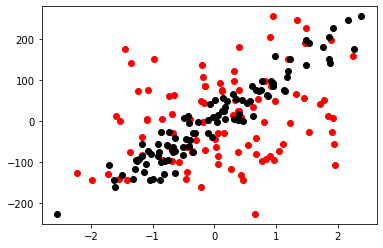

In [178]:
pred= h(X,theta_final)
plt.scatter(x[:,0],y,c="r")
plt.scatter(x[:,1],pred,c="black")

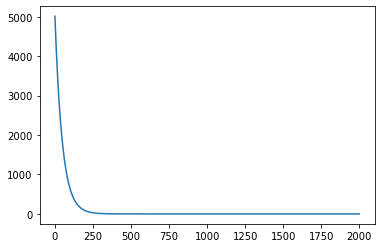

In [182]:
plt.plot(range(2000),cost_history)

### 7-Utiliser le coefficient de détermination pour évaluer la réelle performance et interpréter le resultats

In [186]:
def RR(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v
RR(y,h(X,theta_final))

0.9999999914438763

#  II- Régression Polynomiale

Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice. On développera un modèle qui vise à chercher la fonction de prédiction $$h_\theta(x)=\theta_0+\theta_1 x+\theta_2x^2+.....+\theta_n x^n $$  

# 1-datasets
	Pour n=2, on a 
$
			X=\begin{pmatrix} 
			x^{(1)}&	x^{2^{(1)}}&1\\                
			x^{(2)}&x^{2^{(2)}}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x^{(m)}&x^{2^{(m)}}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	

 ### Refaire les mêmes étapes pour créer un model de prédiction par la régression polynomiale
  NB:modifier les valeurs de y pour rendre le dataset non-linéaire ( utiliser une fonction non linéaire)

In [251]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
np.random.seed(0)
x,y= make_regression(n_samples = 100 , n_features = 1 , noise = 10)
y=y**2+y*0.2


In [252]:
ones = np.ones((100,1))
X = np.concatenate((x,x**2,ones),axis=1)

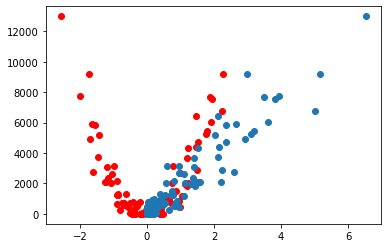

In [253]:
plt.scatter(X[:,0],y , c='r')
plt.scatter(X[:,1],y)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],y)

In [163]:
np.random.seed(0)
te = np.random.randn(3,1)


In [ ]:
New_H = H(X,te)
New_H.shape

In [ ]:
new_thta,new_cout = gradient(X,y,te,1000,0.01)
new_thta

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],y,c='r')
ax.scatter(X[:,0],X[:,1],H(X,new_thta),c='y')

In [ ]:
plt.plot(range(1000),new_cout)

# III- Régressions linéaires avec Statsmodels et Scikit-Learn
 En utilisant les données du fichiers "mtcars.csv", on vise à prédire la consommation d'essence du véhicule "mpg" en fonction du poids du véhicule "wt" et la puissance du vehicule "hp" (horse power) en appliquant la régression linéaire multiple et polynomiale.

## 1-Regression  multiple en utilisant Scikit-Learn 
    1-importer les données 
    2-faites appel à "linear_model.LinearRegression" de Scikit-Learn 
    3-Vous faites la prédiction
    4-Afficher en 3d les résultats 
    5-Quel est la consommation d'essence du véhicule prédite avec le poids de 3.1 et une puissance de 120

In [267]:
import pandas as pd
df=pd.read_csv("mtcars.csv")
x=df[['wt','hp']]
y=np.array([df['mpg']])
y = np.reshape(y,(32,1))

In [269]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

In [270]:
y_pred

array([[23.5723294 ],
       [22.58348256],
       [25.27581872],
       [21.26502011],
       [18.32726664],
       [20.47381631],
       [15.59904236],
       [22.88706734],
       [21.99367331],
       [19.97945988],
       [19.97945988],
       [15.72536854],
       [17.04383099],
       [16.84993945],
       [10.35520459],
       [ 9.36273257],
       [ 9.19248699],
       [26.59902798],
       [29.31238022],
       [28.04620915],
       [24.58644148],
       [18.81136386],
       [19.14097947],
       [14.55202805],
       [16.75674519],
       [27.62665313],
       [26.03737415],
       [27.76976919],
       [16.54648866],
       [20.92541324],
       [12.73947713],
       [22.98364943]])

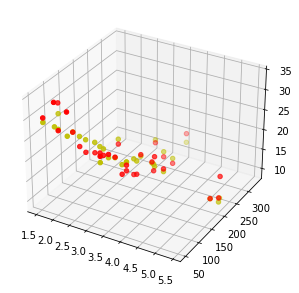

In [272]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x['wt'],x['hp'],y,c='r')
ax.scatter(x['wt'],x['hp'],y_pred,c='y')

In [274]:
test = np.array([3.1,120])
test = np.reshape(test,(1,2))
model.predict(test)

array([[21.39324118]])

In [275]:
from sklearn.metrics import r2_score
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficient of determination: 0.83


In [277]:
model.score(x,y)

0.8267854518827914

## 2-Regression  multiple en utilisant statsmodels
    refaire les memes etatpes, comparer les résultas

In [280]:
import statsmodels.api as sm

#Exécution de la régression
#model_2 = sm.OLS(y, X)
#results = model_2.fit()

In [281]:
#Afficher le résumé des résultats
#print(results.summary())